In [22]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
img = nib.load('filtered_func_data.nii.gz')
img.shape

In [ ]:
img_data=img.get_fdata()
print(type(img_data))
print(img_data.shape)
m=img_data.shape[0]
n=img_data.shape[1]
l=img_data.shape[2]
lx=[]
ly=[]
lz=[]
coordinates=[]
print(m,n,l)
for i in range(m):
    for j in range(n):
        for k in range(l):
        #print(len(img_data[i][j]))
            if max(img_data[i][j][k])!=0 and min(img_data[i][j][k])!=0:
                lx.append(i)
                ly.append(j)
                lz.append(k)
                coordinates.append((i,j,k))
#             print("max:",max(img_data[i][j][k]))
#             print("min:",min(img_data[i][j][k]))

In [ ]:
print(len(img_data[coordinates[0]]))
print(img_data[coordinates[0]])

In [ ]:
# print(min(lx))
# print(max(lx))
# print(min(ly))
# print(max(ly))
# print(min(lz))
# print(max(lz))

print(len(coordinates))
print(coordinates[0:10])

In [ ]:
## Trim the useless zero values - hardcoding this shit
## hardcoding x=15:50, y=8:48, z=1:35
# x_start=16
# x_end=49
# y_start=9
# y_end=47
# z_start=2
# z_end=34
total_nodes=len(coordinates)
new_img=np.ndarray(shape=(total_nodes,137)) ## cause length of the time series for each voxel we want
index=0
for coords in coordinates:
    #print(coords)
    new_img[index]=img_data[coords]
    index+=1
print(index)
# new_img=img_data[x_start:x_end,y_start:y_end,z_start:z_end,:]
# print(new_img.shape)

In [ ]:
print(new_img)

In [ ]:
## Get the graph from this stupid correlation map

## Get the correlation matrix for this array.  
correlation_matrix=np.corrcoef(new_img) 
print(correlation_matrix.shape) ## perfect


In [23]:
## Getting the nodes and edges from this. 
## Making a function and running for different thresholds
def GenerateGraph(corr_matrix,th):
    num_voxels=len(corr_matrix)
    brain_graph=nx.Graph()
    for i in range(num_voxels):
        for j in range(i+1,num_voxels):
            ## if the r value is greater than certain threshold add an edge
            if corr_matrix[i,j]>=th:
                #print(correlation_matrix[i,j])
                brain_graph.add_edge(i,j)
    return brain_graph

In [ ]:
##print(brain_graph)

In [ ]:
## Get simple values for the graph generated.
nodes_list=[]
edges_list=[]
mean_degree_list=[]
clustering_coeff_list=[]
mean_path_len_list=[]
deg_cen_list=[]
harmonic_cen=[]

#th=0.95
for threshold in range(75,96,1):
    th=threshold/100
    print("Threshold value: ",th)
    
    BG=GenerateGraph(correlation_matrix,th)
    ## Number of nodes
    num_nodes=BG.number_of_nodes()
    nodes_list.append(num_nodes)
    print("Nodes: ",num_nodes)
    
    ## Number of edges
    num_edges=BG.number_of_edges()
    edges_list.append(num_edges)
    print("Edges: ",num_edges)
    
    ## Clustering coefficient
    clustering_coeff=nx.average_clustering(BG)
    clustering_coeff_list.append(clustering_coeff)
    print("Clustering Coeff: ",clustering_coeff)
    
    ## Mean degree
    degrees=[d for n,d in BG.degree()]
    mean_degree=np.mean(degrees)
    mean_degree_list.append(mean_degree)
    print("Mean Degree: ",mean_degree)
    
    ## Mean path length
    mean_path_len=nx.shortest_path_length(BG)
    mean_path_lengths=[]
    for mpl in mean_path_len:
        #print(mpl)
        node_lens=[]
        for k,v in mpl[1].items():
            node_lens.append(v)
            #print(k,v)
        ## average length for each node.
        avg_len=sum(node_lens)/(len(node_lens)-1) ## -1 cause it was counting the distance from itself as well. 
        mean_path_lengths.append(avg_len)
    #print(mean_path_lengths)
    mean_path=np.mean(mean_path_lengths)
    mean_path_len_list.append(mean_path)
    print("Mean Path Length: ",mean_path)
    
#     ## Degree centrality
#     deg_cen_dict=nx.degree_centrality(BG)
#     #print(deg_cen)
#     deg_cen=[v for k,v in deg_cen_dict.items()]
#     mean_deg_cen=np.mean(deg_cen)
#     deg_cen_list.append(mean_deg_cen)
#     print("Mean Degree Centrality: ",mean_deg_cen)
    
#     ## Harmonic centrality
#     har_cen_dict=nx.harmonic_centrality(BG)
#     #print(har_cen_dict)
#     har_cen=[v for k,v in har_cen_dict.items()]
#     #print(har_cen)
#     mean_harmonic_centrality=np.mean(har_cen)
#     harmonic_cen_list.append(mean_harmonic_centrality)
#     print("Harmonic Centrality: ",mean_harmonic_centrality)
    
    print("\n")

In [ ]:
print("Nodes: ",nodes_list)
print("Edges: ",edges_list)
print("Clustering Coeff: ",clustering_coeff_list)
print("Mean Degree: ",mean_degree_list)
print("Mean Path Length: ",mean_path_len_list)
# print("Mean Degree Centrality: ",deg_cen_list)
# print("Harmonic Centrality: ", harmonic_cen_list)
print("\n")

In [ ]:
thresholds=[x/100 for x in range(75,96,1)]

In [ ]:
print(thresholds)

In [ ]:
## Have to plot this shit

# plt.figure(figsize=(16,9))
# plt.title('Different graph measures vs threshold values')
# plt.xlabel('Thresholds')
# plt.ylabel('Some Measure')
# #plt.legend(handles=custom_points)

# plt.plot(thresholds,nodes_list,'-',color='#0000ff', label="Number of nodes")


plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(thresholds,nodes_list,'-',color='#0000ff', label="Number of nodes")
ax2.plot(thresholds, edges_list,'-',color='#ff0000',label="Number of edges")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes',color='#0000ff')
ax2.set_ylabel('Number of Edges',color='#ff0000')



plt.show()

In [ ]:

plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(thresholds,clustering_coeff_list,'-',color='#0000ff', label="Number of nodes")
ax2.plot(thresholds,mean_path_len_list,'-',color='#ff0000',label="Number of edges")

ax1.set_xlabel('Thresholds')
ax2.set_ylabel('Mean Path Length',color='#ff0000')
ax1.set_ylabel('Clustering Coefficients',color='#0000ff')


plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Mean degree vs threshold values')
plt.xlabel('Thresholds')
plt.ylabel('Mean Degree')
#plt.legend(handles=custom_points)

plt.plot(thresholds,mean_degree_list,'-',color='#0000ff', label="Number of nodes")


## Other subjects

In [24]:
## taking two participants from CN and SCZ with two different tasks
## CN: Sub12 letter0 and letter1
cn_letter0 = nib.load('Final_data/new_data/CN/sub12_letter0_filtered_func_data.nii.gz')
cn_letter0.shape
cn_letter1 = nib.load('Final_data/new_data/CN/sub12_letter1_filtered_func_data.nii.gz')
cn_letter1.shape

(64, 64, 36, 137)

In [25]:
## SCZ sub1 letter0 and letter1
scz_letter0 = nib.load('Final_data/new_data/SCZ/sub01_letter0_filtered_func_data.nii.gz')
scz_letter0.shape
scz_letter1 = nib.load('Final_data/new_data/SCZ/sub01_letter1_filtered_func_data.nii.gz')
scz_letter1.shape

(64, 64, 36, 137)

In [26]:
cn_letter0_data=cn_letter0.get_fdata()
print(type(cn_letter0_data))
print(cn_letter0_data.shape)
m=cn_letter0_data.shape[0]
n=cn_letter0_data.shape[1]
l=cn_letter0_data.shape[2]
cn_letter0_lx=[]
cn_letter0_ly=[]
cn_letter0_lz=[]
cn_letter0_coordinates=[]
print(m,n,l)
for i in range(m):
    for j in range(n):
        for k in range(l):
            if max(cn_letter0_data[i][j][k])!=0 and min(cn_letter0_data[i][j][k])!=0:
                cn_letter0_lx.append(i)
                cn_letter0_ly.append(j)
                cn_letter0_lz.append(k)
                cn_letter0_coordinates.append((i,j,k))


<class 'numpy.ndarray'>
(64, 64, 36, 137)
64 64 36


In [27]:
cn_letter1_data=cn_letter1.get_fdata()
print(type(cn_letter1_data))
print(cn_letter1_data.shape)
m=cn_letter1_data.shape[0]
n=cn_letter1_data.shape[1]
l=cn_letter1_data.shape[2]
cn_letter1_lx=[]
cn_letter1_ly=[]
cn_letter1_lz=[]
cn_letter1_coordinates=[]
print(m,n,l)
for i in range(m):
    for j in range(n):
        for k in range(l):
            if max(cn_letter1_data[i][j][k])!=0 and min(cn_letter1_data[i][j][k])!=0:
                cn_letter1_lx.append(i)
                cn_letter1_ly.append(j)
                cn_letter1_lz.append(k)
                cn_letter1_coordinates.append((i,j,k))


<class 'numpy.ndarray'>
(64, 64, 36, 137)
64 64 36


In [28]:
scz_letter0_data=scz_letter0.get_fdata()
print(type(scz_letter0_data))
print(scz_letter0_data.shape)
m=scz_letter0_data.shape[0]
n=scz_letter0_data.shape[1]
l=scz_letter0_data.shape[2]
scz_letter0_lx=[]
scz_letter0_ly=[]
scz_letter0_lz=[]
scz_letter0_coordinates=[]
print(m,n,l)
for i in range(m):
    for j in range(n):
        for k in range(l):
            if max(scz_letter0_data[i][j][k])!=0 and min(scz_letter0_data[i][j][k])!=0:
                scz_letter0_lx.append(i)
                scz_letter0_ly.append(j)
                scz_letter0_lz.append(k)
                scz_letter0_coordinates.append((i,j,k))

<class 'numpy.ndarray'>
(64, 64, 36, 137)
64 64 36


In [29]:
scz_letter1_data=scz_letter1.get_fdata()
print(type(scz_letter1_data))
print(scz_letter1_data.shape)
m=scz_letter1_data.shape[0]
n=scz_letter1_data.shape[1]
l=scz_letter1_data.shape[2]
scz_letter1_lx=[]
scz_letter1_ly=[]
scz_letter1_lz=[]
scz_letter1_coordinates=[]
print(m,n,l)
for i in range(m):
    for j in range(n):
        for k in range(l):
            if max(scz_letter1_data[i][j][k])!=0 and min(scz_letter1_data[i][j][k])!=0:
                scz_letter1_lx.append(i)
                scz_letter1_ly.append(j)
                scz_letter1_lz.append(k)
                scz_letter1_coordinates.append((i,j,k))

<class 'numpy.ndarray'>
(64, 64, 36, 137)
64 64 36


In [30]:
print(len(cn_letter0_data[cn_letter0_coordinates[0]]))
print(cn_letter0_data[cn_letter0_coordinates[0]])

137
[1269.05285645 1292.76586914 1290.45153809 1284.30407715 1280.60046387
 1259.46508789 1275.68725586 1274.59655762 1258.75183105 1268.63745117
 1286.18005371 1271.3770752  1263.0032959  1269.88635254 1275.70288086
 1269.38391113 1287.98413086 1272.37805176 1264.0892334  1272.49719238
 1277.55114746 1263.04870605 1280.67431641 1264.109375   1270.28527832
 1255.12731934 1265.31433105 1269.4675293  1257.55102539 1256.94909668
 1267.28161621 1283.84875488 1241.2598877  1274.68127441 1278.49560547
 1264.390625   1281.27758789 1268.43457031 1290.35839844 1280.20129395
 1273.23718262 1322.98791504 1298.91064453 1279.91052246 1282.29785156
 1283.17077637 1278.46679688 1283.48583984 1286.8404541  1245.66381836
 1280.7713623  1277.52197266 1296.36682129 1295.61645508 1287.20336914
 1276.83557129 1294.87451172 1279.28234863 1277.91540527 1275.69592285
 1280.73083496 1274.62182617 1279.5456543  1262.11865234 1289.92529297
 1283.62133789 1272.64794922 1283.6965332  1279.95373535 1283.33056641
 1

In [31]:
print(len(cn_letter0_coordinates))
print(cn_letter0_coordinates[0:10])

30270
[(15, 19, 16), (15, 19, 17), (15, 19, 18), (15, 20, 15), (15, 20, 16), (15, 20, 17), (15, 20, 18), (15, 20, 19), (15, 20, 20), (15, 20, 21)]


In [32]:
total_nodes=len(cn_letter0_coordinates)
new_cn_letter0=np.ndarray(shape=(total_nodes,137)) ## cause length of the time series for each voxel we want
index=0
for coords in cn_letter0_coordinates:
    #print(coords)
    new_cn_letter0[index]=cn_letter0_data[coords]
    index+=1
print(index)

30270


In [33]:
total_nodes=len(cn_letter1_coordinates)
new_cn_letter1=np.ndarray(shape=(total_nodes,137)) ## cause length of the time series for each voxel we want
index=0
for coords in cn_letter1_coordinates:
    #print(coords)
    new_cn_letter1[index]=cn_letter1_data[coords]
    index+=1
print(index)

30374


In [34]:
total_nodes=len(scz_letter0_coordinates)
new_scz_letter0=np.ndarray(shape=(total_nodes,137)) ## cause length of the time series for each voxel we want
index=0
for coords in scz_letter0_coordinates:
    #print(coords)
    new_scz_letter0[index]=scz_letter0_data[coords]
    index+=1
print(index)

31416


In [35]:
total_nodes=len(scz_letter1_coordinates)
new_scz_letter1=np.ndarray(shape=(total_nodes,137)) ## cause length of the time series for each voxel we want
index=0
for coords in scz_letter1_coordinates:
    #print(coords)
    new_scz_letter1[index]=scz_letter1_data[coords]
    index+=1
print(index)

31303


In [36]:
print(new_scz_letter1)

[[1060.79797363 1052.89501953 1028.74365234 ... 1059.01049805
  1074.16247559 1064.31994629]
 [1980.59851074 2025.78955078 1965.11120605 ... 2013.62780762
  2016.80700684 2057.23095703]
 [2655.16625977 2707.99169922 2645.79174805 ... 2705.72949219
  2684.32080078 2727.84838867]
 ...
 [2308.16625977 2563.24658203 2572.07446289 ... 2653.08447266
  2654.7980957  2684.81030273]
 [3126.88867188 3494.74755859 3488.69848633 ... 3552.52172852
  3543.34130859 3599.6628418 ]
 [3043.44091797 3271.91479492 3244.45849609 ... 3245.02978516
  3228.08032227 3268.01831055]]


In [37]:
## Get the graph from this stupid correlation map

## Get the correlation matrix for this array.  
correlation_matrix_cn_letter0=np.corrcoef(new_cn_letter0) 
print(correlation_matrix_cn_letter0.shape) ## perfect
## Get the correlation matrix for this array.  
correlation_matrix_cn_letter1=np.corrcoef(new_cn_letter1) 
print(correlation_matrix_cn_letter1.shape) ## perfect
## Get the correlation matrix for this array.  
correlation_matrix_scz_letter0=np.corrcoef(new_scz_letter0) 
print(correlation_matrix_scz_letter0.shape) ## perfect
## Get the correlation matrix for this array.  
correlation_matrix_scz_letter1=np.corrcoef(new_scz_letter1) 
print(correlation_matrix_scz_letter1.shape) ## perfect

(30270, 30270)
(30374, 30374)
(31416, 31416)
(31303, 31303)


In [38]:
## Get simple values for the graph generated. CN letter0
cn_letter0_nodes_list=[]
cn_letter0_edges_list=[]
cn_letter0_mean_degree_list=[]
cn_letter0_clustering_coeff_list=[]
cn_letter0_mean_path_len_list=[]


#th=0.95
for threshold in range(75,96,1):
    th=threshold/100
    print("Threshold value: ",th)
    
    BG=GenerateGraph(correlation_matrix_cn_letter0,th)
    ## Number of nodes
    cn_letter0_num_nodes=BG.number_of_nodes()
    cn_letter0_nodes_list.append(cn_letter0_num_nodes)
    print("Nodes: ",cn_letter0_num_nodes)
    
    ## Number of edges
    cn_letter0_num_edges=BG.number_of_edges()
    cn_letter0_edges_list.append(cn_letter0_num_edges)
    print("Edges: ",cn_letter0_num_edges)
    
    ## Clustering coefficient
    cn_letter0_clustering_coeff=nx.average_clustering(BG)
    cn_letter0_clustering_coeff_list.append(cn_letter0_clustering_coeff)
    print("Clustering Coeff: ",cn_letter0_clustering_coeff)
    
    ## Mean degree
    degrees=[d for n,d in BG.degree()]
    cn_letter0_mean_degree=np.mean(degrees)
    cn_letter0_mean_degree_list.append(cn_letter0_mean_degree)
    print("Mean Degree: ",cn_letter0_mean_degree)
    
    ## Mean path length
    mean_path_len=nx.shortest_path_length(BG)
    cn_letter0_mean_path_lengths=[]
    for mpl in mean_path_len:
        #print(mpl)
        node_lens=[]
        for k,v in mpl[1].items():
            node_lens.append(v)
            #print(k,v)
        ## average length for each node.
        avg_len=sum(node_lens)/(len(node_lens)-1) ## -1 cause it was counting the distance from itself as well. 
        cn_letter0_mean_path_lengths.append(avg_len)
    #print(mean_path_lengths)
    cn_letter0_mean_path=np.mean(cn_letter0_mean_path_lengths)
    cn_letter0_mean_path_len_list.append(cn_letter0_mean_path)
    print("Mean Path Length: ",cn_letter0_mean_path)
    
    print("\n")

Threshold value:  0.75
Nodes:  28188
Edges:  379181
Clustering Coeff:  0.3571359597662739
Mean Degree:  26.90371789413935
Mean Path Length:  10.007323525740887


Threshold value:  0.76
Nodes:  27732
Edges:  336600
Clustering Coeff:  0.34683248090313035
Mean Degree:  24.275205538727825
Mean Path Length:  10.657020125856636


Threshold value:  0.77
Nodes:  27250
Edges:  297914
Clustering Coeff:  0.3352718413512673
Mean Degree:  21.865247706422018
Mean Path Length:  11.062406658437231


Threshold value:  0.78
Nodes:  26686
Edges:  262172
Clustering Coeff:  0.32269203481733066
Mean Degree:  19.64865472532414
Mean Path Length:  11.791209030102287


Threshold value:  0.79
Nodes:  26015
Edges:  229384
Clustering Coeff:  0.31126094145475414
Mean Degree:  17.63474918316356
Mean Path Length:  12.470994559245128


Threshold value:  0.8
Nodes:  25227
Edges:  199265
Clustering Coeff:  0.298501219384635
Mean Degree:  15.79775637214096
Mean Path Length:  13.402000959266104


Threshold value:  0.81
No

In [39]:
print("Nodes: ",cn_letter0_nodes_list)
print("Edges: ",cn_letter0_edges_list)
print("Clustering Coeff: ",cn_letter0_clustering_coeff_list)
print("Mean Degree: ",cn_letter0_mean_degree_list)
print("Mean Path Length: ",cn_letter0_mean_path_len_list)
print("\n")

Nodes:  [28188, 27732, 27250, 26686, 26015, 25227, 24383, 23436, 22294, 20985, 19487, 17828, 16076, 14145, 12268, 10428, 8613, 6966, 5345, 3937, 2641]
Edges:  [379181, 336600, 297914, 262172, 229384, 199265, 172387, 147636, 125241, 105193, 87450, 71541, 57637, 45758, 35459, 27131, 19984, 14435, 9953, 6554, 3945]
Clustering Coeff:  [0.3571359597662739, 0.34683248090313035, 0.3352718413512673, 0.32269203481733066, 0.31126094145475414, 0.298501219384635, 0.28679208859319744, 0.2724827315616316, 0.2614822769663164, 0.2514202707143766, 0.24236445418076993, 0.23292890935097024, 0.22629103792426783, 0.2211539749165682, 0.21180145204166423, 0.20504349596303958, 0.19386198234933827, 0.18363750047713565, 0.1744444635695209, 0.1721187280598651, 0.1672713372720652]
Mean Degree:  [26.90371789413935, 24.275205538727825, 21.865247706422018, 19.64865472532414, 17.63474918316356, 15.79775637214096, 14.1399335602674, 12.599078341013826, 11.235399659101104, 10.025542053847987, 8.975214245394366, 8.025689

In [40]:
## Get simple values for the graph generated. CN letter1
cn_letter1_nodes_list=[]
cn_letter1_edges_list=[]
cn_letter1_mean_degree_list=[]
cn_letter1_clustering_coeff_list=[]
cn_letter1_mean_path_len_list=[]


#th=0.95
for threshold in range(75,96,1):
    th=threshold/100
    print("Threshold value: ",th)
    
    BG=GenerateGraph(correlation_matrix_cn_letter1,th)
    ## Number of nodes
    cn_letter1_num_nodes=BG.number_of_nodes()
    cn_letter1_nodes_list.append(cn_letter1_num_nodes)
    print("Nodes: ",cn_letter1_num_nodes)
    
    ## Number of edges
    cn_letter1_num_edges=BG.number_of_edges()
    cn_letter1_edges_list.append(cn_letter1_num_edges)
    print("Edges: ",cn_letter1_num_edges)
    
    ## Clustering coefficient
    cn_letter1_clustering_coeff=nx.average_clustering(BG)
    cn_letter1_clustering_coeff_list.append(cn_letter1_clustering_coeff)
    print("Clustering Coeff: ",cn_letter1_clustering_coeff)
    
    ## Mean degree
    degrees=[d for n,d in BG.degree()]
    cn_letter1_mean_degree=np.mean(degrees)
    cn_letter1_mean_degree_list.append(cn_letter1_mean_degree)
    print("Mean Degree: ",cn_letter1_mean_degree)
    
    ## Mean path length
    mean_path_len=nx.shortest_path_length(BG)
    cn_letter1_mean_path_lengths=[]
    for mpl in mean_path_len:
        #print(mpl)
        node_lens=[]
        for k,v in mpl[1].items():
            node_lens.append(v)
            #print(k,v)
        ## average length for each node.
        avg_len=sum(node_lens)/(len(node_lens)-1) ## -1 cause it was counting the distance from itself as well. 
        cn_letter1_mean_path_lengths.append(avg_len)
    #print(mean_path_lengths)
    cn_letter1_mean_path=np.mean(cn_letter1_mean_path_lengths)
    cn_letter1_mean_path_len_list.append(cn_letter1_mean_path)
    print("Mean Path Length: ",cn_letter1_mean_path)
    
    print("\n")

Threshold value:  0.75
Nodes:  28115
Edges:  182861
Clustering Coeff:  0.33629988718211423
Mean Degree:  13.008073981860218
Mean Path Length:  10.870425062508419


Threshold value:  0.76
Nodes:  27668
Edges:  162167
Clustering Coeff:  0.3242245330354577
Mean Degree:  11.722350730085298
Mean Path Length:  11.702056703123663


Threshold value:  0.77
Nodes:  27187
Edges:  143298
Clustering Coeff:  0.3100028174107736
Mean Degree:  10.541655938500018
Mean Path Length:  12.584141603227184


Threshold value:  0.78
Nodes:  26612
Edges:  126265
Clustering Coeff:  0.2965757641497823
Mean Degree:  9.489328122651436
Mean Path Length:  13.346814994439782


Threshold value:  0.79
Nodes:  25893
Edges:  110771
Clustering Coeff:  0.28443017609238147
Mean Degree:  8.556057621751052
Mean Path Length:  14.514794386089228


Threshold value:  0.8
Nodes:  25123
Edges:  96608
Clustering Coeff:  0.26908634112592084
Mean Degree:  7.690801257811567
Mean Path Length:  15.229692793644318


Threshold value:  0.81
N

In [41]:
print("Nodes: ",cn_letter1_nodes_list)
print("Edges: ",cn_letter1_edges_list)
print("Clustering Coeff: ",cn_letter1_clustering_coeff_list)
print("Mean Degree: ",cn_letter1_mean_degree_list)
print("Mean Path Length: ",cn_letter1_mean_path_len_list)
print("\n")

Nodes:  [28115, 27668, 27187, 26612, 25893, 25123, 24211, 23155, 21999, 20613, 19023, 17263, 15503, 13444, 11356, 9410, 7432, 5799, 4289, 3006, 1933]
Edges:  [182861, 162167, 143298, 126265, 110771, 96608, 83721, 71914, 61380, 51830, 43357, 35753, 28984, 22984, 17801, 13585, 9850, 6996, 4733, 3044, 1762]
Clustering Coeff:  [0.33629988718211423, 0.3242245330354577, 0.3100028174107736, 0.2965757641497823, 0.28443017609238147, 0.26908634112592084, 0.2572607694539065, 0.24498598563016505, 0.22993939510371908, 0.21885939766786386, 0.2090090174323935, 0.19502166954654285, 0.18313159340306776, 0.17944510346085837, 0.17262807749004036, 0.16513526941464612, 0.15961465126556115, 0.14327211441939858, 0.13447927273638505, 0.13389570540083745, 0.11337925423956065]
Mean Degree:  [13.008073981860218, 11.722350730085298, 10.541655938500018, 9.489328122651436, 8.556057621751052, 7.690801257811567, 6.915947296683326, 6.211530986827899, 5.580253647893086, 5.028865279192742, 4.558376701887189, 4.142153739

In [42]:
## Get simple values for the graph generated. CN letter0
scz_letter0_nodes_list=[]
scz_letter0_edges_list=[]
scz_letter0_mean_degree_list=[]
scz_letter0_clustering_coeff_list=[]
scz_letter0_mean_path_len_list=[]


#th=0.95
for threshold in range(75,96,1):
    th=threshold/100
    print("Threshold value: ",th)
    
    BG=GenerateGraph(correlation_matrix_scz_letter0,th)
    ## Number of nodes
    scz_letter0_num_nodes=BG.number_of_nodes()
    scz_letter0_nodes_list.append(scz_letter0_num_nodes)
    print("Nodes: ",scz_letter0_num_nodes)
    
    ## Number of edges
    scz_letter0_num_edges=BG.number_of_edges()
    scz_letter0_edges_list.append(scz_letter0_num_edges)
    print("Edges: ",scz_letter0_num_edges)
    
    ## Clustering coefficient
    scz_letter0_clustering_coeff=nx.average_clustering(BG)
    scz_letter0_clustering_coeff_list.append(scz_letter0_clustering_coeff)
    print("Clustering Coeff: ",scz_letter0_clustering_coeff)
    
    ## Mean degree
    degrees=[d for n,d in BG.degree()]
    scz_letter0_mean_degree=np.mean(degrees)
    scz_letter0_mean_degree_list.append(scz_letter0_mean_degree)
    print("Mean Degree: ",scz_letter0_mean_degree)
    
    ## Mean path length
    mean_path_len=nx.shortest_path_length(BG)
    scz_letter0_mean_path_lengths=[]
    for mpl in mean_path_len:
        #print(mpl)
        node_lens=[]
        for k,v in mpl[1].items():
            node_lens.append(v)
            #print(k,v)
        ## average length for each node.
        avg_len=sum(node_lens)/(len(node_lens)-1) ## -1 cause it was counting the distance from itself as well. 
        scz_letter0_mean_path_lengths.append(avg_len)
    #print(mean_path_lengths)
    scz_letter0_mean_path=np.mean(scz_letter0_mean_path_lengths)
    scz_letter0_mean_path_len_list.append(scz_letter0_mean_path)
    print("Mean Path Length: ",scz_letter0_mean_path)
    
    print("\n")

Threshold value:  0.75
Nodes:  29337
Edges:  268725
Clustering Coeff:  0.3575189418356723
Mean Degree:  18.319869107270684
Mean Path Length:  10.52631849631193


Threshold value:  0.76
Nodes:  28906
Edges:  236246
Clustering Coeff:  0.34716073993379193
Mean Degree:  16.345810558361585
Mean Path Length:  11.139286859164345


Threshold value:  0.77
Nodes:  28482
Edges:  206982
Clustering Coeff:  0.33620577753242764
Mean Degree:  14.534232146618917
Mean Path Length:  11.83516156313835


Threshold value:  0.78
Nodes:  27986
Edges:  180680
Clustering Coeff:  0.32451215908439757
Mean Degree:  12.912170370899736
Mean Path Length:  12.329144388141378


Threshold value:  0.79
Nodes:  27358
Edges:  157191
Clustering Coeff:  0.3125839996397029
Mean Degree:  11.491410190803421
Mean Path Length:  12.850286212446424


Threshold value:  0.8
Nodes:  26679
Edges:  136053
Clustering Coeff:  0.2974701103586228
Mean Degree:  10.199257843247498
Mean Path Length:  13.044032804728541


Threshold value:  0.81

In [43]:
print("Nodes: ",scz_letter0_nodes_list)
print("Edges: ",scz_letter0_edges_list)
print("Clustering Coeff: ",scz_letter0_clustering_coeff_list)
print("Mean Degree: ",scz_letter0_mean_degree_list)
print("Mean Path Length: ",scz_letter0_mean_path_len_list)
print("\n")

Nodes:  [29337, 28906, 28482, 27986, 27358, 26679, 25872, 24931, 23894, 22716, 21324, 19811, 17966, 15918, 13869, 11710, 9404, 7271, 5316, 3677, 2372]
Edges:  [268725, 236246, 206982, 180680, 157191, 136053, 117199, 100319, 85167, 71796, 59750, 49207, 39545, 31254, 24378, 18322, 13353, 9284, 6163, 3849, 2192]
Clustering Coeff:  [0.3575189418356723, 0.34716073993379193, 0.33620577753242764, 0.32451215908439757, 0.3125839996397029, 0.2974701103586228, 0.28488612426011756, 0.2699174976172221, 0.2551635705387188, 0.24083971444003235, 0.22441008708075638, 0.2113627066761863, 0.19822530561781812, 0.18679285917770272, 0.1769281315793985, 0.1657245818540859, 0.15467442415750732, 0.142364805935218, 0.13649139098597415, 0.11744746879404463, 0.09465325989356348]
Mean Degree:  [18.319869107270684, 16.345810558361585, 14.534232146618917, 12.912170370899736, 11.491410190803421, 10.199257843247498, 9.05991032776747, 8.0477317396013, 7.128735247342429, 6.321183306920233, 5.604014256237104, 4.967644238

In [44]:
## Get simple values for the graph generated. CN letter0
scz_letter1_nodes_list=[]
scz_letter1_edges_list=[]
scz_letter1_mean_degree_list=[]
scz_letter1_clustering_coeff_list=[]
scz_letter1_mean_path_len_list=[]


#th=0.95
for threshold in range(75,96,1):
    th=threshold/100
    print("Threshold value: ",th)
    
    BG=GenerateGraph(correlation_matrix_scz_letter1,th)
    ## Number of nodes
    scz_letter1_num_nodes=BG.number_of_nodes()
    scz_letter1_nodes_list.append(scz_letter1_num_nodes)
    print("Nodes: ",scz_letter1_num_nodes)
    
    ## Number of edges
    scz_letter1_num_edges=BG.number_of_edges()
    scz_letter1_edges_list.append(scz_letter1_num_edges)
    print("Edges: ",scz_letter1_num_edges)
    
    ## Clustering coefficient
    scz_letter1_clustering_coeff=nx.average_clustering(BG)
    scz_letter1_clustering_coeff_list.append(scz_letter1_clustering_coeff)
    print("Clustering Coeff: ",scz_letter1_clustering_coeff)
    
    ## Mean degree
    degrees=[d for n,d in BG.degree()]
    scz_letter1_mean_degree=np.mean(degrees)
    scz_letter1_mean_degree_list.append(scz_letter1_mean_degree)
    print("Mean Degree: ",scz_letter1_mean_degree)
    
    ## Mean path length
    mean_path_len=nx.shortest_path_length(BG)
    scz_letter1_mean_path_lengths=[]
    for mpl in mean_path_len:
        #print(mpl)
        node_lens=[]
        for k,v in mpl[1].items():
            node_lens.append(v)
            #print(k,v)
        ## average length for each node.
        avg_len=sum(node_lens)/(len(node_lens)-1) ## -1 cause it was counting the distance from itself as well. 
        scz_letter1_mean_path_lengths.append(avg_len)
    #print(mean_path_lengths)
    scz_letter1_mean_path=np.mean(scz_letter1_mean_path_lengths)
    scz_letter1_mean_path_len_list.append(scz_letter1_mean_path)
    print("Mean Path Length: ",scz_letter1_mean_path)
    
    print("\n")

Threshold value:  0.75
Nodes:  29885
Edges:  437241
Clustering Coeff:  0.39759125773369774
Mean Degree:  29.261569349171825
Mean Path Length:  8.862241825174948


Threshold value:  0.76
Nodes:  29578
Edges:  368018
Clustering Coeff:  0.3891795579700725
Mean Degree:  24.884576374332273
Mean Path Length:  9.449771093722175


Threshold value:  0.77
Nodes:  29225
Edges:  309152
Clustering Coeff:  0.3792627335283964
Mean Degree:  21.156680923866553
Mean Path Length:  10.051015341926833


Threshold value:  0.78
Nodes:  28871
Edges:  259322
Clustering Coeff:  0.368092415952436
Mean Degree:  17.96418551487652
Mean Path Length:  10.451699509000653


Threshold value:  0.79
Nodes:  28446
Edges:  217805
Clustering Coeff:  0.3571051334612277
Mean Degree:  15.313576601279618
Mean Path Length:  11.21861868253778


Threshold value:  0.8
Nodes:  27933
Edges:  183246
Clustering Coeff:  0.3455682090157032
Mean Degree:  13.120395231446675
Mean Path Length:  11.829601676023435


Threshold value:  0.81
Node

In [45]:
print("Nodes: ",scz_letter1_nodes_list)
print("Edges: ",scz_letter1_edges_list)
print("Clustering Coeff: ",scz_letter1_clustering_coeff_list)
print("Mean Degree: ",scz_letter1_mean_degree_list)
print("Mean Path Length: ",scz_letter1_mean_path_len_list)
print("\n")

Nodes:  [29885, 29578, 29225, 28871, 28446, 27933, 27340, 26668, 25841, 24917, 23875, 22639, 21169, 19454, 17356, 15046, 12495, 9774, 7199, 4947, 3115]
Edges:  [437241, 368018, 309152, 259322, 217805, 183246, 154420, 129768, 108838, 90976, 75544, 62135, 50371, 40306, 31402, 23751, 17371, 12060, 7880, 4820, 2676]
Clustering Coeff:  [0.39759125773369774, 0.3891795579700725, 0.3792627335283964, 0.368092415952436, 0.3571051334612277, 0.3455682090157032, 0.33420208691022607, 0.3215317284225262, 0.30568566120057056, 0.28584828373127236, 0.2660922244521124, 0.24517231741962037, 0.2232636341963263, 0.2033214929250036, 0.1862606615736761, 0.16483371090015592, 0.15260907503862223, 0.1391041215170074, 0.12535654599722693, 0.10471026933143004, 0.09982735652077543]
Mean Degree:  [29.261569349171825, 24.884576374332273, 21.156680923866553, 17.96418551487652, 15.313576601279618, 13.120395231446675, 11.296269202633503, 9.732113394330284, 8.423667814713053, 7.302323714732913, 6.328293193717277, 5.48920

## Lets get some graphs now

In [48]:
thresholds=[x/100 for x in range(75,96,1)]
print(thresholds)

[0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95]


<Figure size 1152x648 with 0 Axes>

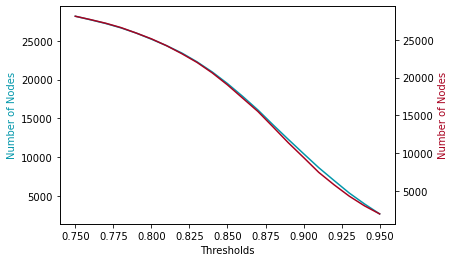

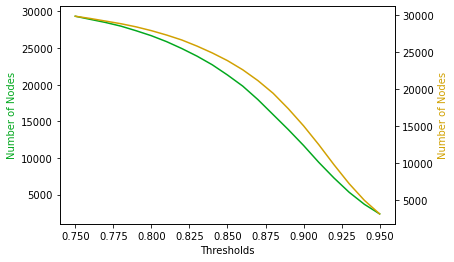

In [65]:
## Graph for all of them together?

## Blue: #0297ab
## Green: #02a81e
## Red: #a80220
## Yellow: #d1a102 


plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(thresholds,cn_letter0_nodes_list,'-',color='#0297ab', label="Number of nodes for CN task-letter0")
ax2.plot(thresholds,cn_letter1_nodes_list,'-',color='#a80220', label="Number of nodes for CN task-letter1")


ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes',color='#0297ab')
ax2.set_ylabel('Number of Nodes',color='#a80220')


fig, ax3 = plt.subplots()
ax4=ax3.twinx()

ax3.plot(thresholds, scz_letter0_nodes_list,'-',color='#02a81e',label="Number of nodes for SCZ task-letter0")
ax4.plot(thresholds, scz_letter1_nodes_list,'-',color='#d1a102',label="Number of nodes for SCZ task-letter1")


ax3.set_xlabel('Thresholds')
ax3.set_ylabel('Number of Nodes',color='#02a81e')
ax4.set_ylabel('Number of Nodes',color='#d1a102')



plt.show()

<Figure size 1152x648 with 0 Axes>

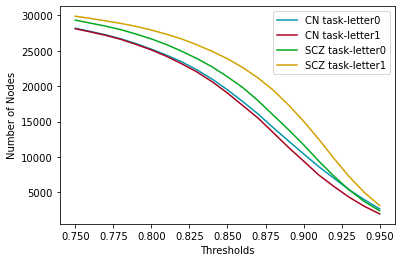

In [57]:
## Number of Nodes

plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()
ax1.plot(thresholds,cn_letter0_nodes_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_nodes_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter0_nodes_list,'-',color='#02a81e',label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_nodes_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes')
plt.legend()
plt.show()

<Figure size 1152x648 with 0 Axes>

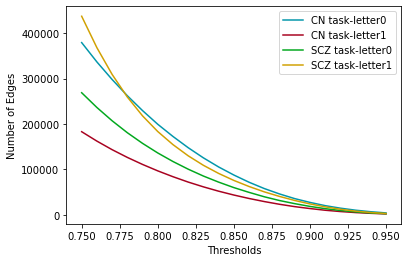

In [62]:
## Number of edges

plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()
ax1.plot(thresholds,cn_letter0_edges_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_edges_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter0_edges_list,'-',color='#02a81e',label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_edges_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Edges')
plt.legend()
plt.show()

<Figure size 1152x648 with 0 Axes>

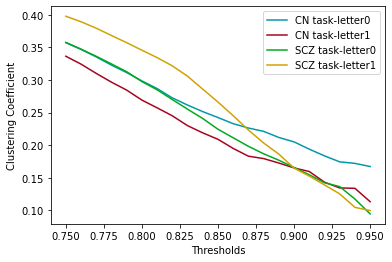

In [59]:
## Clustering coeffiecient

plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()
ax1.plot(thresholds,cn_letter0_clustering_coeff_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_clustering_coeff_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter0_clustering_coeff_list,'-',color='#02a81e',label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_clustering_coeff_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Clustering Coefficient')
plt.legend()
plt.show()

<Figure size 1152x648 with 0 Axes>

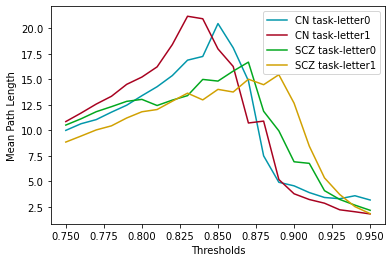

In [60]:
## Mean Path Length
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()
ax1.plot(thresholds,cn_letter0_mean_path_len_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_mean_path_len_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter0_mean_path_len_list,'-',color='#02a81e',label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_mean_path_len_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Path Length')
plt.legend()
plt.show()


<Figure size 1152x648 with 0 Axes>

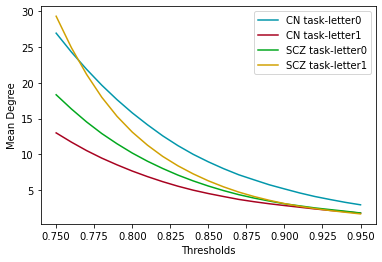

In [61]:
## Mean Degree
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()
ax1.plot(thresholds,cn_letter0_mean_degree_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_mean_degree_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter0_mean_degree_list,'-',color='#02a81e',label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_mean_degree_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Degree')
plt.legend()
plt.show()

## Between Tasks for one cohort

<Figure size 1152x648 with 0 Axes>

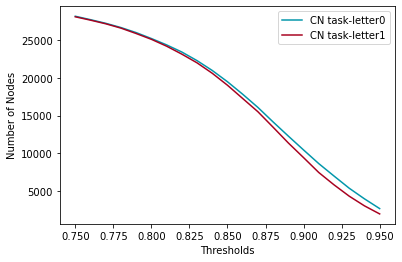

<Figure size 1152x648 with 0 Axes>

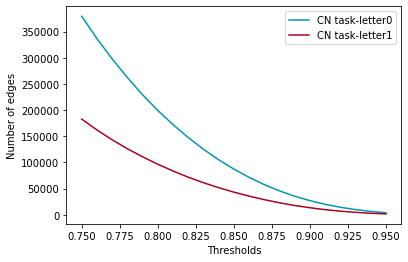

<Figure size 1152x648 with 0 Axes>

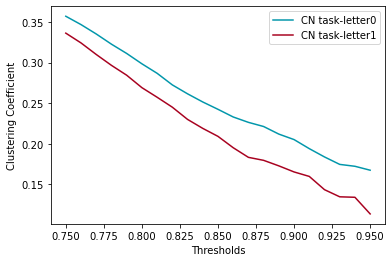

<Figure size 1152x648 with 0 Axes>

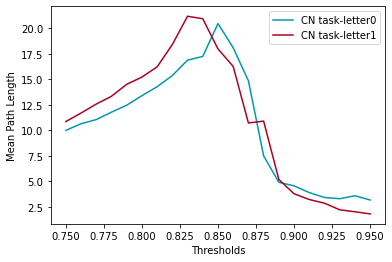

<Figure size 1152x648 with 0 Axes>

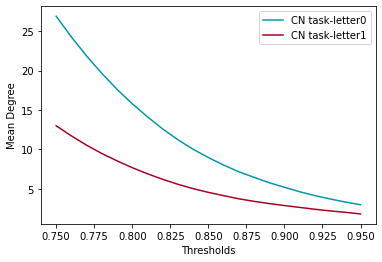

In [72]:
## CN letter0 vs letter1

## Blue: #0297ab (CN letter0)
## Green: #02a81e (SCZ letter0)
## Red: #a80220 (CN letter1)
## Yellow: #d1a102 (SCZ letter1)

## Number of Nodes
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax1.plot(thresholds,cn_letter0_nodes_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds, cn_letter1_nodes_list,'-',color='#a80220',label="CN task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes')

plt.legend()
plt.show()


## Number of edges
plt.figure(figsize=(16,9))
fig, ax2 = plt.subplots()

ax2.plot(thresholds,cn_letter0_edges_list,'-',color='#0297ab', label="CN task-letter0")
ax2.plot(thresholds, cn_letter1_edges_list,'-',color='#a80220',label="CN task-letter1")


ax2.set_xlabel('Thresholds')
ax2.set_ylabel('Number of edges')
plt.legend()
plt.show()

## Clustering Coeff
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_clustering_coeff_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_clustering_coeff_list,'-',color='#a80220',label="CN task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Clustering Coefficient')
plt.legend()
plt.show()

## Mean Path len
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_mean_path_len_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_mean_path_len_list,'-',color='#a80220',label="CN task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Path Length')
plt.legend()
plt.show()

## Mean degree
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_mean_degree_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,cn_letter1_mean_degree_list,'-',color='#a80220',label="CN task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Degree')
plt.legend()
plt.show()



<Figure size 1152x648 with 0 Axes>

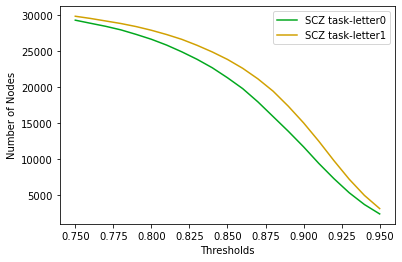

<Figure size 1152x648 with 0 Axes>

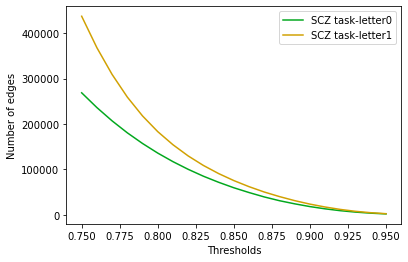

<Figure size 1152x648 with 0 Axes>

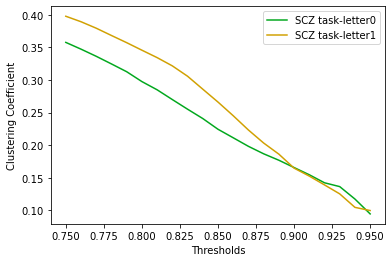

<Figure size 1152x648 with 0 Axes>

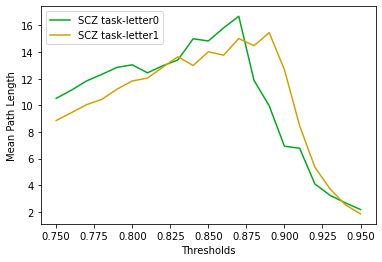

<Figure size 1152x648 with 0 Axes>

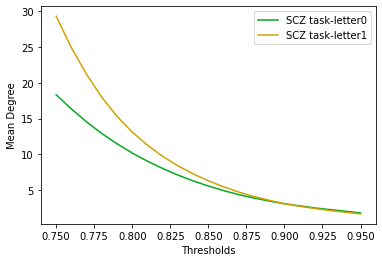

In [74]:
## SCZ letter0 vs SCZ letter1

## Blue: #0297ab (CN letter0)
## Green: #02a81e (SCZ letter0)
## Red: #a80220 (CN letter1)
## Yellow: #d1a102 (SCZ letter1)

## Number of Nodes
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax1.plot(thresholds,scz_letter0_nodes_list,'-',color='#02a81e', label="SCZ task-letter0")
ax1.plot(thresholds, scz_letter1_nodes_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes')

plt.legend()
plt.show()


## Number of edges
plt.figure(figsize=(16,9))
fig, ax2 = plt.subplots()

ax2.plot(thresholds,scz_letter0_edges_list,'-',color='#02a81e', label="SCZ task-letter0")
ax2.plot(thresholds, scz_letter1_edges_list,'-',color='#d1a102',label="SCZ task-letter1")


ax2.set_xlabel('Thresholds')
ax2.set_ylabel('Number of edges')
plt.legend()
plt.show()

## Clustering Coeff
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,scz_letter0_clustering_coeff_list,'-',color='#02a81e', label="SCZ task-letter0")
ax1.plot(thresholds,scz_letter1_clustering_coeff_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Clustering Coefficient')
plt.legend()
plt.show()

## Mean Path len
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,scz_letter0_mean_path_len_list,'-',color='#02a81e', label="SCZ task-letter0")
ax1.plot(thresholds,scz_letter1_mean_path_len_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Path Length')
plt.legend()
plt.show()

## Mean degree
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,scz_letter0_mean_degree_list,'-',color='#02a81e', label="SCZ task-letter0")
ax1.plot(thresholds,scz_letter1_mean_degree_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Degree')
plt.legend()
plt.show()




## Between cohorts for one task

<Figure size 1152x648 with 0 Axes>

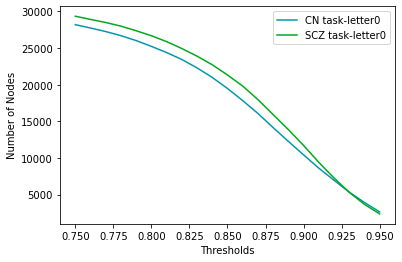

<Figure size 1152x648 with 0 Axes>

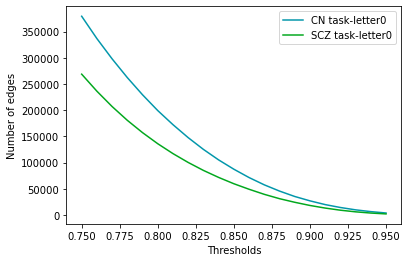

<Figure size 1152x648 with 0 Axes>

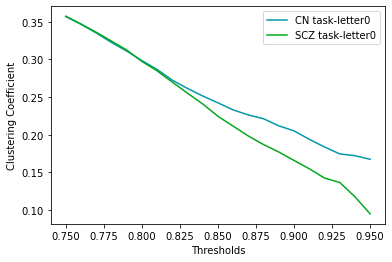

<Figure size 1152x648 with 0 Axes>

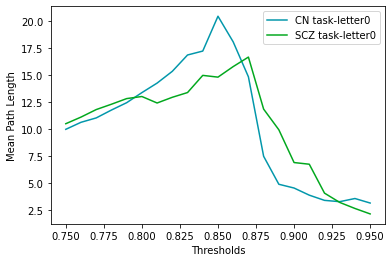

<Figure size 1152x648 with 0 Axes>

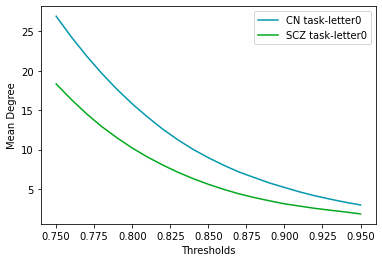

In [75]:
## CN letter0 vs SCZ letter0

## Blue: #0297ab (CN letter0)
## Green: #02a81e (SCZ letter0)
## Red: #a80220 (CN letter1)
## Yellow: #d1a102 (SCZ letter1)

## Number of Nodes
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax1.plot(thresholds,cn_letter0_nodes_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds, scz_letter0_nodes_list,'-',color='#02a81e',label="SCZ task-letter0")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes')

plt.legend()
plt.show()


## Number of edges
plt.figure(figsize=(16,9))
fig, ax2 = plt.subplots()

ax2.plot(thresholds,cn_letter0_edges_list,'-',color='#0297ab', label="CN task-letter0")
ax2.plot(thresholds, scz_letter0_edges_list,'-',color='#02a81e',label="SCZ task-letter0")


ax2.set_xlabel('Thresholds')
ax2.set_ylabel('Number of edges')
plt.legend()
plt.show()

## Clustering Coeff
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_clustering_coeff_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,scz_letter0_clustering_coeff_list,'-',color='#02a81e',label="SCZ task-letter0")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Clustering Coefficient')
plt.legend()
plt.show()

## Mean Path len
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_mean_path_len_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,scz_letter0_mean_path_len_list,'-',color='#02a81e',label="SCZ task-letter0")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Path Length')
plt.legend()
plt.show()

## Mean degree
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter0_mean_degree_list,'-',color='#0297ab', label="CN task-letter0")
ax1.plot(thresholds,scz_letter0_mean_degree_list,'-',color='#02a81e',label="SCZ task-letter0")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Degree')
plt.legend()
plt.show()




<Figure size 1152x648 with 0 Axes>

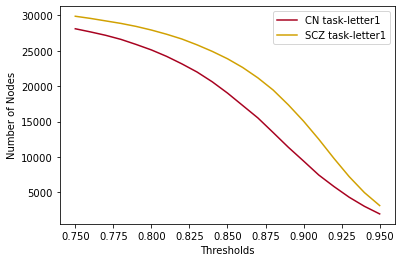

<Figure size 1152x648 with 0 Axes>

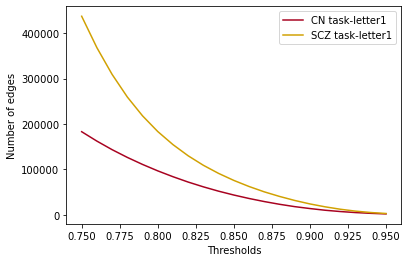

<Figure size 1152x648 with 0 Axes>

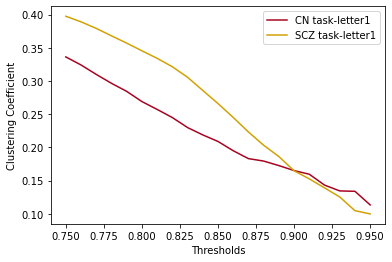

<Figure size 1152x648 with 0 Axes>

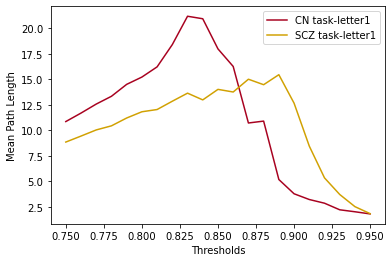

<Figure size 1152x648 with 0 Axes>

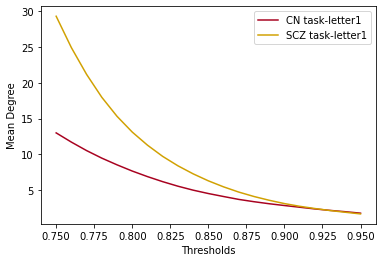

In [76]:
## CN letter1 vs SCZ letter1


## Blue: #0297ab (CN letter0)
## Green: #02a81e (SCZ letter0)
## Red: #a80220 (CN letter1)
## Yellow: #d1a102 (SCZ letter1)

## Number of Nodes
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()

ax1.plot(thresholds,cn_letter1_nodes_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds, scz_letter1_nodes_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Number of Nodes')

plt.legend()
plt.show()


## Number of edges
plt.figure(figsize=(16,9))
fig, ax2 = plt.subplots()

ax2.plot(thresholds,cn_letter1_edges_list,'-',color='#a80220', label="CN task-letter1")
ax2.plot(thresholds, scz_letter1_edges_list,'-',color='#d1a102',label="SCZ task-letter1")


ax2.set_xlabel('Thresholds')
ax2.set_ylabel('Number of edges')
plt.legend()
plt.show()

## Clustering Coeff
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter1_clustering_coeff_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds,scz_letter1_clustering_coeff_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Clustering Coefficient')
plt.legend()
plt.show()

## Mean Path len
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter1_mean_path_len_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds,scz_letter1_mean_path_len_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Path Length')
plt.legend()
plt.show()

## Mean degree
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots()


ax1.plot(thresholds,cn_letter1_mean_degree_list,'-',color='#a80220', label="CN task-letter1")
ax1.plot(thresholds,scz_letter1_mean_degree_list,'-',color='#d1a102',label="SCZ task-letter1")

ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Mean Degree')
plt.legend()
plt.show()

